In [7]:
import numpy as np
import matplotlib.pyplot as plt

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x

# Definición de variables
e_probability = [0.001, 0.0036, 0.01, 0.05, 0.1]
C_esperado = [0.105, 0.138, 0.185, 0.37, 0.61]
# Inicialización de resultados
p_error = np.zeros(len(e_probability))
C = np.zeros(p_error.shape)
img_ancho = 120

# generacion de patrones
w = np.zeros((img_ancho**2, img_ancho**2))
p_max = 0
# Cálculo de resultados
for i in range(len(e_probability)):
    
    while p_error[i] < e_probability[i]:
        # generación de patrones
        x = 2*np.random.binomial(1, 0.499, (img_ancho, img_ancho)) - 1
        w += np.outer(x, x)
        np.fill_diagonal(w, 0)
        x_aux = np.dot(w, x.flatten())
        x_aux = signo(x_aux.reshape(img_ancho, img_ancho))
        p_max += 1
        p_error[i] = np.mean(x_aux != x)


    C[i] = (p_max)/(x.size)
    print('Probabilidad de error calculada: ', p_error[i], 'para una probabilidad de ', e_probability[i])
    print('Capacidad de almacenamiento calculada: ', C[i], 'para una capacidad esperada de ', C_esperado[i])
        

Probabilidad de error calculada:  0.001 para una probabilidad de  0.001
Capacidad de almacenamiento calculada:  0.094 para una capacidad esperada de  0.105
Probabilidad de error calculada:  0.0036 para una probabilidad de  0.0036
Capacidad de almacenamiento calculada:  0.1211 para una capacidad esperada de  0.138
Probabilidad de error calculada:  0.0101 para una probabilidad de  0.01
Capacidad de almacenamiento calculada:  0.1696 para una capacidad esperada de  0.185


KeyboardInterrupt: 

In [8]:
# evalauando la evolución de la capacidad de almacenamiento con patrones parecidos

import numpy as np
import matplotlib.pyplot as plt

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x

# Definición de variables
e_probability = 0.001

# Inicialización de resultados
pixeles_incremento = 5
img_ancho = 100

# generacion de patrones
w = np.zeros((img_ancho**2, img_ancho**2))

# primer patrón
x = 2*np.random.binomial(1, 0.499, (img_ancho**2, 1)) - 1
iteraciones = len(x)//pixeles_incremento

w += np.outer(x, x)
np.fill_diagonal(w, 0)
pixeles_diferentes = np.linspace(0, len(x), iteraciones, dtype=int)
Capacidad = np.zeros(pixeles_diferentes.size)
i = 1

for i in range(iteraciones):
    n = np.random.randint(0, len(x), pixeles_incremento, dtype=int)
    x_aux = x
    x_aux[n] = -x_aux[n]
    w += np.outer(x_aux, x_aux)
    np.fill_diagonal(w, 0)
    Capacidad[i] = 1 - np.mean(signo(np.dot(w, x_aux)) != x_aux)
    x = x_aux
    

plt.plot(pixeles_diferentes, Capacidad)
plt.xlabel('Pixeles diferentes')
plt.ylabel('Probabilidad de error')
plt.title('Grado de exactitud en función de los pixeles diferentes')
plt.show()

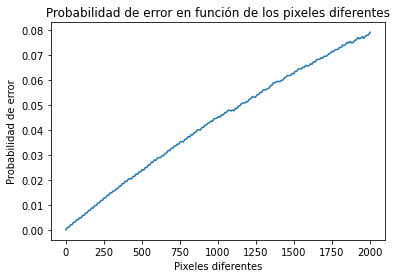